# Visualizations and more analysis with PmagPy

This notebook demonstrates PmagPy functions that can be used to visualize data as well as those that conduct statistical tests that have associated visualizations.

## Guide to PmagPy

The notebook is one of a series for notebooks that demonstrate the functionality of PmagPy. The other notebooks are:

- [PmagPy_introduction.ipynb](PmagPy_introduction.ipynb) This notebook introduces PmagPy and lists the functions that are demonstrated in the other notebooks. 
- [PmagPy_calculations.ipynb](PmagPy_calculations.ipynb) This notebook demonstrates many of the PmagPy calculation functions such as those that rotate directions, return statistical parameters, and simulate data from specified distributions
- [PmagPy_MagIC.ipynb](PmagPy_MagIC.ipynb) This notebook demonstrates how PmagPy can be used to read and write data to and from the MagIC database format including conversion from many individual lab measurement file formats.

## Customizing this notebook

If you want to make changes to this notebook, you should make a copy (see File menu).  Otherwise each time you update **PmagPy**, your changes will be overwritten.

## Get started

To use the functions in this notebook, we have to   import the **PmagPy** modules **pmagplotlib**, **pmag** and **ipmag** and some other handy functions for use in the notebook.  This is done in the following code block which must be executed before running any other code block. To execute, click on the code block and then click on the "Run" button in the menu.  

In order to access the example data, this notebook is meant to be run in the PmagPy-data directory (PmagPy directory for developers).

Try it!  Run the code block below (click on the cell and then click 'Run'):

In [1]:
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag
import pmagpy.contribution_builder as cb
from pmagpy import convert_2_magic as convert
import matplotlib.pyplot as plt # our plotting buddy
import numpy as np # the fabulous NumPy package
import pandas as pd # and of course Pandas
# test if Basemap and/or cartopy is installed
has_basemap, Basemap = pmag.import_basemap()
has_cartopy, Cartopy = pmag.import_cartopy()
# test if xlwt is installed (allows you to export to excel)
try:
    import xlwt
    has_xlwt = True
except ImportError:
    has_xlwt = False
# This allows you to make matplotlib plots inside the notebook.  
%matplotlib inline 
from IPython.display import Image
import os

print('All modules imported!')

All modules imported!


### Functions demonstrated within [PmagPy_plots_tests.ipynb](PmagPy_plots_tests.ipynb):
- Functions in **PmagPy_plots_tests.ipynb**
    - [ani_depthplot](#ani_depthplot) : plots anisotropy data against depth in stratigraphic section (Xmas tree plots)
    - [aniso_magic](#aniso_magic) : makes plots of anisotropy data and bootstrapped confidences 
    - [biplot_magic](#biplot_magic) : plots different columns against each other in MagIC formatted data files
    - [chi_magic](#chi_magic) : plots magnetic susceptibility data in MagIC format as function of field, frequency or temperature
    - [common_mean](#common_mean) : graphical approach to testing two sets of directions for common mean using bootstrap
    - [cont_rot](#cont_rot) : makes plots of continents after rotation to specified coordinate system
    - [core_depthplot](#core_depthplot) : plots MagIC formatted data 
    - [curie](#curie) : makes plots of Curie Temperature data and provides estimates for Tc
    - [dayplot_magic](#dayplot_magic) : makes Day et al. (1977) and other plots with hysteresis statistics
    - [dmag_magic](#dmag_magic) : plots remanence against demagnetization step for MagIC formatted files
    - [eqarea](#eqarea) and [eqarea_magic](#eqarea_magic) : makes equal area projections for directions
    - [eqarea_ell](#eqarea_ell) : makes equal area projections for directions with specified confidence ellipses
    - [find_ei](#find_ei) : finds the inclination unflattening factor that unsquishes directions to match TK03 distribution
    - [fishqq](#fishqq): makes a Quantile-Quantile plot for directions against uniform and exponential distributions
    - [foldtest](#foldtest) & [foldtest_magic](#foldtest_magic) : finds  tilt correction that maximizes concentration of directions, with bootstrap confidence bounds.          
    - [forc_diagram](#forc_diagram): plots FORC diagrams for both conventional and irregular FORCs
    - [hysteresis_magic](#hysteresis_magic) : makes plots of hysteresis data (not FORCs). 
    - [irm_unmix](#irm_unmix) : analyzes IRM acquisition data in terms of coercivity distributions
    - [irmaq_magic](#irm_magic) : plots IRM acquistion data
    - [lnp_magic](#lnp_magic) : plots lines and planes for site level data and calculates best fit mean and alpha_95
    - [lowes](#lowes) : makes a plot of the Lowe's spectrum for a geomagnetic field model
    - [lowrie](#lowrie) and [lowrie_magic](#lowrie_magic) : makes plots of Lowrie's (1990) 3D-IRM demagnetization experiments
    - [plot_cdf](#plot_cdf) and [plot_2cdfs](#plot_2cdfs) : makes a cumulative distribution plot of data
    - [plotdi_a](#plotdi_a) : makes equal are plots of directions and their $\alpha_{95}$s
    - [plot_geomagia](#plot_geomagia) : makes plots from files downloaded from the  geomagia website
    - [plot_mag_map](#plot_mag_map) : makes a color contour plot of geomagnetic field models
    - [plot_magic_keys](#plot_magic_keys) : plots data from MagIC formatted data files
    - [plot_map_pts](#plot_map_pts) : plots points on maps
    - [plot_ts](#plot_ts) : makes a plot of the desired Geomagnetic Reversal time scale
    - [polemap_magic](#polemap_magic) : reads in MagIC formatted file with paleomagnetic poles and plots them
    - [qqplot](#qqplot) : makes a Quantile-Quantile plot for data against a normal distribution
    - [qqunf](#qqunf) : makes a Quantile-Quantile plot for data against a uniform distribution
    - [quick_hyst](#quick_hyst) : makes hysteresis plots
    - [revtest](#revtest) & [revtest_magic](#revtest_magic) : performs a bootstrap reversals test
    - [thellier_magic](#thellier_magic) : makes plots of thellier-thellier data. 
    - [vgpmap_magic](#vgpmap_magic) : reads in MagIC formatted file with virtual geomagnetic poles and plots them
    - [watsons_v](#watsons_v) : makes a graph for Watson's V test for common mean
    - [zeq](#zeq) and [zeq_magic](#zeq_magic) : makes quick zijderveld plots for measurement data

- Maps: 






## Figures

- The plotting functions make plots to the screen (using the  `%matplotlib inline` magic command), but all **matplotlib** plots can be saved with the command: 

`plt.savefig('PATH_TO_FILE_NAME.FMT') `

and then viewed in the notebook with:

`Image('PATH_TO_FILE_NAME.FMT')`




## ani_depthplot


[\[Essentials Chapter 13\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch13.html#x15-15600013) [\[MagIC Database\]](https://earthref.org/MagIC) [\[command_line_version\]](http://pmagpy.github.io/PmagPy-cli.html#ani_depthplot.py)

 Anisotropy data can be plotted versus depth. The program **ani_depthplot** uses MagIC formatted data tables. Bulk susceptibility measurements can also be plotted if they are available in a **measurements.txt** formatted file.

In this example, we will use the data from Tauxe et al. (2015, doi:10.1016/j.epsl.2014.12.034) measured on samples obtained during Expedition 318 of the International Ocean Drilling Program. To get the entire dataset, go to the MagIC data base at: https://www2.earthref.org/MagIC/doi/10.1016/j.epsl.2014.12.034.  Download the data set and unpack it with [ipmag.download_magic](#download_magic).


We will use the **ipmag.ani_depthplot()** version of this program.

In [2]:
help(ipmag.ani_depthplot)

Help on function ani_depthplot in module pmagpy.ipmag:

ani_depthplot(spec_file='specimens.txt', samp_file='samples.txt', meas_file='measurements.txt', site_file='sites.txt', age_file='', sum_file='', fmt='svg', dmin=-1, dmax=-1, depth_scale='core_depth', dir_path='.', contribution=None)
    returns matplotlib figure with anisotropy data plotted against depth
    available depth scales: 'composite_depth', 'core_depth' or 'age' (you must provide an age file to use this option).
    You must provide valid specimens and sites files, and either a samples or an ages file.
    You may additionally provide measurements and a summary file (csv).
    
    Parameters
    ----------
    spec_file : str, default "specimens.txt"
    samp_file : str, default "samples.txt"
    meas_file : str, default "measurements.txt"
    site_file : str, default "sites.txt"
    age_file : str, default ""
    sum_file : str, default ""
    fmt : str, default "svg"
        format for figures, ["svg", "jpg", "pdf", "

And here we go:

-I- Using online data model
-I- Getting method codes from earthref.org
-I- Importing controlled vocabularies from https://earthref.org


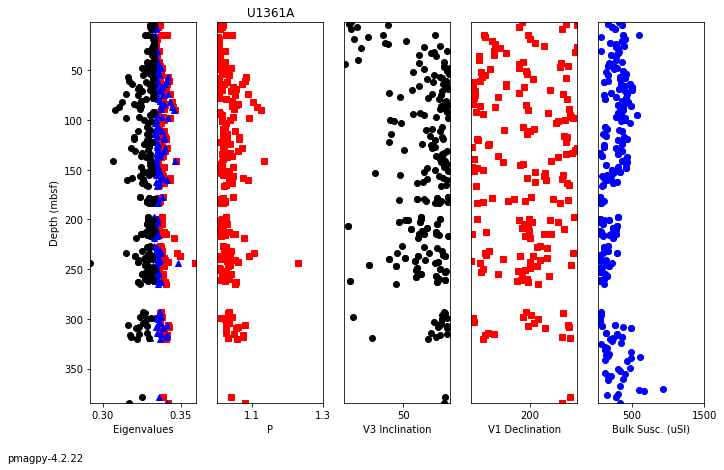

In [3]:
ipmag.ani_depthplot(dir_path='data_files/ani_depthplot');

## aniso_magic


[\[Essentials Chapter 13\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch13.html#x15-15600013) [\[MagIC Database\]](https://earthref.org/MagIC) [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#aniso_magic.py)

 Samples were collected from the eastern margin a dike oriented with a bedding pole declination of 110∘ and dip of 2∘. The data have been imported into a MagIC (data model 3) formatted file named dike_specimens.txt.

We will make a plot of the data using **ipmag.aniso_magic_nb()**, using the site parametric bootstrap option and plot out the bootstrapped eigenvectors. We will also draw on the trace of the dike.



In [4]:
help(ipmag.aniso_magic)

Help on function aniso_magic in module pmagpy.ipmag:

aniso_magic(infile='specimens.txt', samp_file='samples.txt', site_file='sites.txt', ipar=1, ihext=1, ivec=1, iplot=0, isite=1, iboot=1, vec=0, Dir=[], PDir=[], comp=0, user='', fmt='png', crd='s', verbose=True, plots=0, num_bootstraps=1000, dir_path='.', input_dir_path='')



In [5]:
help(ipmag.aniso_magic_nb)

Help on function aniso_magic_nb in module pmagpy.ipmag:

aniso_magic_nb(infile='specimens.txt', samp_file='samples.txt', site_file='sites.txt', verbose=True, ipar=False, ihext=True, ivec=False, isite=False, iloc=False, iboot=False, vec=0, Dir=[], PDir=[], crd='s', num_bootstraps=1000, dir_path='.', fignum=1, save_plots=True, interactive=False, fmt='png')
    Makes plots of anisotropy eigenvectors, eigenvalues and confidence bounds
    All directions are on the lower hemisphere.
    
    Parameters
    __________
        infile : specimens formatted file with aniso_s data
        samp_file : samples formatted file with sample => site relationship
        site_file : sites formatted file with site => location relationship
        verbose : if True, print messages to output
        confidence bounds options:
            ipar : if True - perform parametric bootstrap - requires non-blank aniso_s_sigma
            ihext : if True - Hext ellipses
            ivec : if True - plot bootstrapped

-W- Couldn't read in samples data
-I- Make sure you've provided the correct file name
-W- Couldn't read in samples data
-I- Make sure you've provided the correct file name
desired coordinate system not available, using available:  g


(True, [])

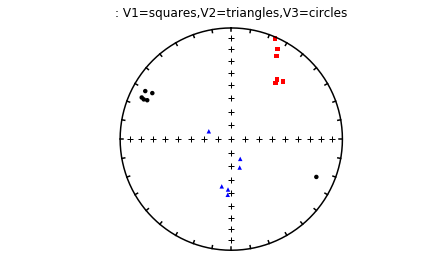

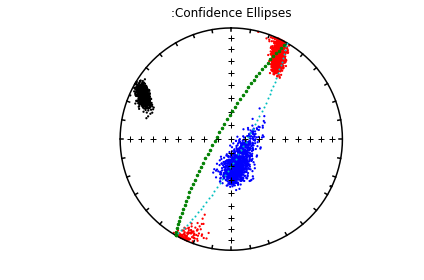

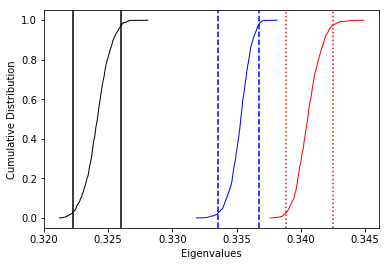

In [6]:
ipmag.aniso_magic_nb(infile='dike_specimens.txt',dir_path='data_files/aniso_magic',
       iboot=1,ihext=0,ivec=1,PDir=[120,10],ipar=1, save_plots=False) # compare dike directions with plane of dike with pole of 120,10

 The specimen eigenvectors are plotted in the top diagram with the usual convention that squares are the V$_1$ directions, triangles are the V$_2$ directions and circles are the V$_3$ directions. All directions are plotted on the lower hemisphere. The bootstrapped eigenvectors are shown in the middle diagram. Cumulative distributions of the bootstrapped eigenvalues are shown in the bottom plot with the 95% confidence bounds plotted as vertical lines. It appears that the magma was moving in the northern and slightly up direction along the dike.

There are more options to **ipmag.aniso_magic_nb()** that come in handy. In particular, one often wishes to test if a particular fabric is isotropic (the three eigenvalues cannot be distinguished), or if a particular eigenvector is parallel to some direction. For example, undisturbed sedimentary fabrics are oblate (the maximum and intermediate directions cannot be distinguished from one another, but are distinct from the minimum) and the eigenvector associated with the minimum eigenvalue is vertical. These criteria can be tested using the distributions of bootstrapped eigenvalues and eigenvectors.

The following session illustrates how this is done, using the data in the test file sed_specimens.txt in the aniso_magic directory. 

-W- Couldn't read in samples data
-I- Make sure you've provided the correct file name
-W- Couldn't read in samples data
-I- Make sure you've provided the correct file name
desired coordinate system not available, using available:  g


(True, [])

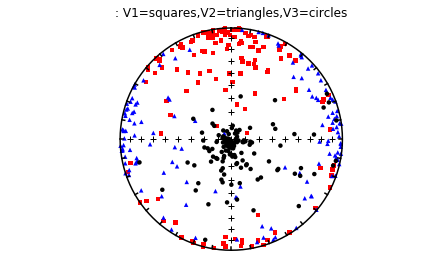

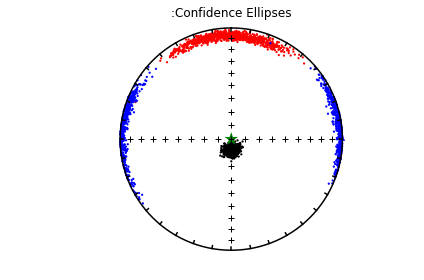

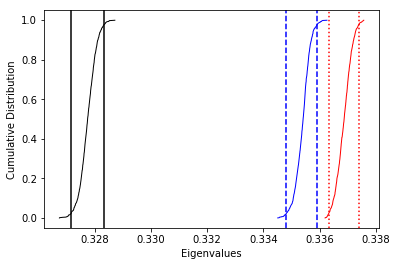

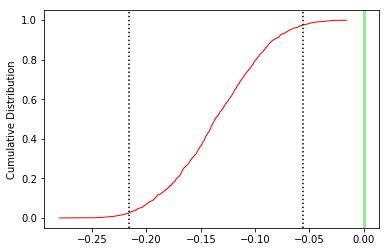

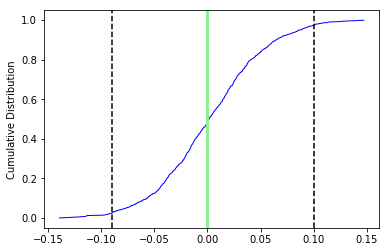

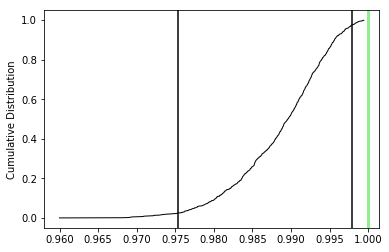

In [7]:
ipmag.aniso_magic_nb(infile='sed_specimens.txt',dir_path='data_files/aniso_magic',
       iboot=1,ihext=0,ivec=1,Dir=[0,90],vec=3,ipar=1, save_plots=False) # parametric bootstrap and compare V3 with vertical

The top three plots are as in the dike example before, showing a clear triaxial fabric (all three eigenvalues and associated eigenvectors are distinct from one another. In the lower three plots we have the distributions of the three components of the chosen axis, V$_3$, their 95% confidence bounds (dash lines) and the components of the designated direction (solid line). This direction is also shown in the equal area projection above as a red pentagon. The minimum eigenvector is not vertical in this case. 

## biplot_magic 

[\[Essentials Chapter 8\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch8.html#x15-1560008) [\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#biplot_magic.py)

It is often useful to plot measurements from one experiement against another. For example, rock magnetic studies of sediments often plot the IRM against the ARM or magnetic susceptibility. All of these types of measurements can be imported into a single measurements formatted file and use the MagIC method codes and other clues (lab fields, etc.) to differentiate one measurement from another. 

Data were obtained by Hartl and Tauxe (1997, doi: 10.1111/j.1365-246X.1997.tb04082.x) from a Paleogene core from 28$^{\circ}$ S (DSDP Site 522) and used for a relative paleointensity study. IRM, ARM, magnetic susceptibility and remanence data were uploaded to the MagIC database. The MagIC measurements formatted file for this study (which you can get from   https://earthref.org/MagIC/doi/10.1111/j.1365-246X.1997.tb04082.x and unpack with [download_magic](#download_magic)  is saved in data_files/biplot_magic/measurements.txt. 

We can create these plots using Pandas.  The key to what the measurements mean is in the [Magic method codes](https://www2.earthref.org/MagIC/method-codes), so we can first get a unique list of all the available method_codes, then plot the ones we are interested in  against each other.  Let's read in the data file in to a **Pandas** DataFrame and exctract the method codes to see what we have: 

In [8]:
# read in the data
meas_df=pd.read_csv('data_files/biplot_magic/measurements.txt',sep='\t',header=1)
# get the method_codes and print
print(meas_df.method_codes.unique())
# take a look at the top part of the measurements data frame
meas_df.head()

['LT-AF-Z' 'LT-AF-I' 'LT-IRM' 'LP-X']


,citations,dir_dec,dir_inc,experiment,magn_mass,meas_temp,measurement,method_codes,quality,specimen,standard,susc_chi_mass,treat_ac_field,treat_dc_field,treat_step_num,treat_temp
0,This study,268.5,-41.2,15-1-013:LP-AF-DIR,0.000003,300,15-1-013:LP-AF-DIR-1,LT-AF-Z,g,15-1-013,u,NaN,0.015,0.00000,1.0,300
1,This study,NaN,NaN,15-1-013:LP-ARM,0.000179,300,15-1-013:LP-ARM-2,LT-AF-I,g,15-1-013,u,NaN,0.080,0.00005,2.0,300
2,This study,NaN,NaN,15-1-013:LP-IRM,0.003600,300,15-1-013:LP-IRM-3,LT-IRM,g,15-1-013,u,NaN,0.000,1.00000,3.0,300
3,This study,NaN,NaN,15-1-013:LP-X,NaN,300,15-1-013:LP-X-4,LP-X,NaN,15-1-013,NaN,2.380000e-07,0.010,0.00000,4.0,300
4,This study,181.0,68.6,15-1-022:LP-AF-DIR,0.000011,300,15-1-022:LP-AF-DIR-5,LT-AF-Z,g,15-1-022,u,NaN,0.015,0.00000,5.0,300


These are: an AF demag step (LT-AF-Z), an ARM (LT-AF-I), an IRM  (LT-IRM) and a susceptibility (LP-X).  Now we can fish out data for each method, merge them by specimen, dropping any missing measurements and finally plot one against the other.  

In [9]:
# get the IRM data
IRM=meas_df[meas_df.method_codes.str.contains('LT-IRM')]
IRM=IRM[['specimen','magn_mass']] #trim the data frame
IRM.columns=['specimen','IRM'] # rename the column
# do the same for the ARM data
ARM=meas_df[meas_df.method_codes.str.contains('LT-AF-I')]
ARM=ARM[['specimen','magn_mass']]
ARM.columns=['specimen','ARM']
# and the magnetic susceptibility
CHI=meas_df[meas_df.method_codes.str.contains('LP-X')]
CHI=CHI[['specimen','susc_chi_mass']]  
CHI.columns=['specimen','CHI']
# merge IRM ARM data by specimen
RMRMs=pd.merge(IRM,ARM,on='specimen')
# add on the susceptility data
RMRMs=pd.merge(RMRMs,CHI,on='specimen')

Now we are ready to make the plots.  

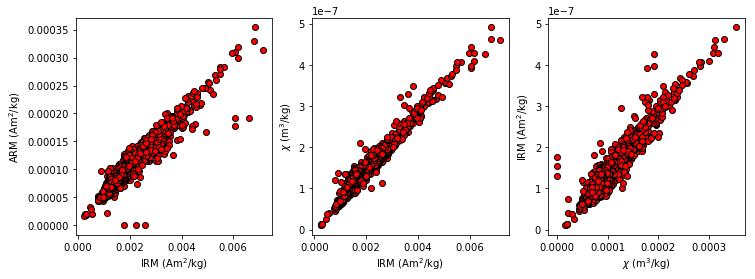

In [10]:
fig=plt.figure(1, (12,4)) # make a figure
fig.add_subplot(131) # make the first in a row of three subplots 
plt.plot(RMRMs.IRM,RMRMs.ARM,'ro',markeredgecolor='black')
plt.xlabel('IRM (Am$^2$/kg)') # label the X axis
plt.ylabel('ARM (Am$^2$/kg)') # and the Y axis
fig.add_subplot(132)# make the second in a row of three subplots 
plt.plot(RMRMs.IRM,RMRMs.CHI,'ro',markeredgecolor='black')
plt.xlabel('IRM (Am$^2$/kg)')
plt.ylabel('$\chi$ (m$^3$/kg)')
fig.add_subplot(133)# and the third in a row of three subplots 
plt.plot(RMRMs.ARM,RMRMs.CHI,'ro',markeredgecolor='black')
plt.xlabel('$\chi$ (m$^3$/kg)')
plt.ylabel('IRM (Am$^2$/kg)');

## chi_magic


[\[Essentials Chapter 8\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch8.html#x15-1560008) [\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#chi_magic.py)

 It is sometimes useful to measure susceptibility as a function of temperature, applied field and frequency. Here we use a data set that came from the Tiva Canyon Tuff sequence (see Jackson et al., 2006, doi: 10.1029/2006JB004514). 


**chi_magic** reads in a MagIC formatted file and makes various plots.  We do this using Pandas.


Not enough data to plot IRM-Kappa-2352


(True, [])

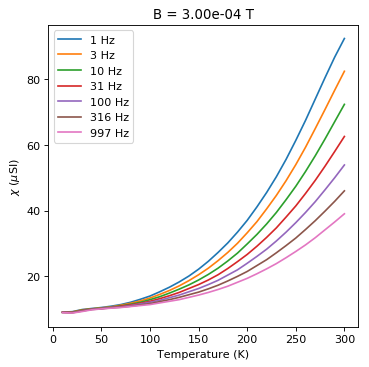

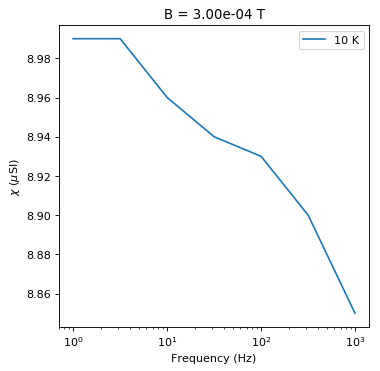

In [11]:
# with ipmag
ipmag.chi_magic('data_files/chi_magic/measurements.txt', save_plots=False)

In [12]:
# read in data from data model 3 example file using pandas
chi_data=pd.read_csv('data_files/chi_magic/measurements.txt',sep='\t',header=1)
print (chi_data.columns)
# get arrays of available temps, frequencies and fields
Ts=np.sort(chi_data.meas_temp.unique())
Fs=np.sort(chi_data.meas_freq.unique())
Bs=np.sort(chi_data.meas_field_ac.unique())


Index(['experiment', 'specimen', 'measurement', 'treat_step_num', 'citations',
       'instrument_codes', 'method_codes', 'meas_field_ac', 'meas_freq',
       'meas_temp', 'timestamp', 'susc_chi_qdr_volume', 'susc_chi_volume'],
      dtype='object')


Text(0.5, 1.0, 'B = 3.00e-04 T')

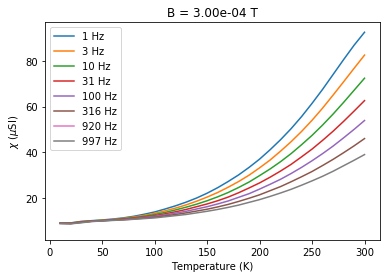

In [13]:
# plot chi versus temperature at constant field
b=Bs.max()
for f in Fs:
    this_f=chi_data[chi_data.meas_freq==f]
    this_f=this_f[this_f.meas_field_ac==b]
    plt.plot(this_f.meas_temp,1e6*this_f.susc_chi_volume,label='%i'%(f)+' Hz')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('$\chi$ ($\mu$SI)')
plt.title('B = '+'%7.2e'%(b)+ ' T')

Text(0.5, 1.0, 'B = 3.00e-04 T')

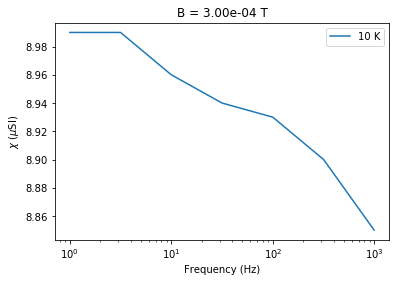

In [14]:
# plot chi versus frequency at constant B
b=Bs.max()
t=Ts.min()
this_t=chi_data[chi_data.meas_temp==t]
this_t=this_t[this_t.meas_field_ac==b]
plt.semilogx(this_t.meas_freq,1e6*this_t.susc_chi_volume,label='%i'%(t)+' K')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('$\chi$ ($\mu$SI)')
plt.title('B = '+'%7.2e'%(b)+ ' T')

 You can see the dependence on temperature, frequency and applied field. These data support the suggestion that there is a strong superparamagnetic component in these specimens.


## common_mean

[\[Essentials Chapter 12\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch12.html#x15-15600012)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#common_mean.py)

 Most paleomagnetists use some form of Fisher Statistics to decide if two directions are statistically distinct or not (see [Essentials Chapter 11](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html#x15-15600011) for a discussion of those techniques. But often directional data are not Fisher distributed and the parametric approach will give misleading answers. In these cases, one can use a boostrap approach, described in detail in [Essentials Chapter 12]. The program **common_mean** can be used for a bootstrap test for common mean to check whether two declination, inclination data sets have a common mean at the 95% level of confidence. 
 
 We want to compare the two data sets: common_mean_ex_file1.dat and common_mean_ex_file2.dat. But first, let’s look at the data in equal area projection using the methods outline in the section on [eqarea](#eqarea).





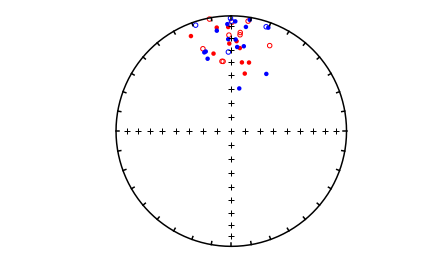

In [15]:
directions_A=np.loadtxt('data_files/common_mean/common_mean_ex_file1.dat')
directions_B=np.loadtxt('data_files/common_mean/common_mean_ex_file2.dat') 
ipmag.plot_net(1)
ipmag.plot_di(di_block=directions_A,color='red')
ipmag.plot_di(di_block=directions_B,color='blue')


Now let’s look at the common mean problem using **ipmag.common_mean_bootstrap()**.

In [16]:
help(ipmag.common_mean_bootstrap)

Help on function common_mean_bootstrap in module pmagpy.ipmag:

common_mean_bootstrap(Data1, Data2, NumSims=1000, save=False, save_folder='.', fmt='svg', figsize=(7, 2.3), x_tick_bins=4)
    Conduct a bootstrap test (Tauxe, 2010) for a common mean on two declination,
    inclination data sets. Plots are generated of the cumulative distributions
    of the Cartesian coordinates of the means of the pseudo-samples (one for x,
    one for y and one for z). If the 95 percent confidence bounds for each
    component overlap, the two directions are not significantly different.
    
    Parameters
    ----------
    Data1 : a nested list of directional data [dec,inc] (a di_block)
    Data2 : a nested list of directional data [dec,inc] (a di_block)
            if Data2 is length of 1, treat as single direction
    NumSims : number of bootstrap samples (default is 1000)
    save : optional save of plots (default is False)
    save_folder : path to directory where plots should be saved
    fmt : 

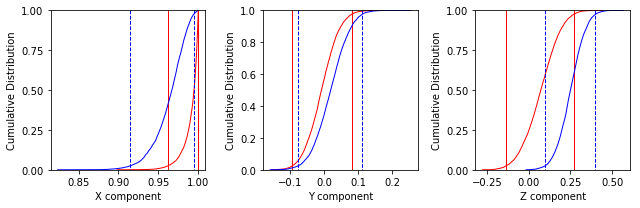

In [17]:
ipmag.common_mean_bootstrap(directions_A,directions_B,figsize=(9,3))

 These suggest that the two data sets share a common mean.

Now compare the data in common_mean_ex_file1.dat with the expected direction at the 5$^{\circ}$ N latitude that these data were collected (Dec=0, Inc=9.9).

To do this, we set the second data set to be the desired direction for comparison. 



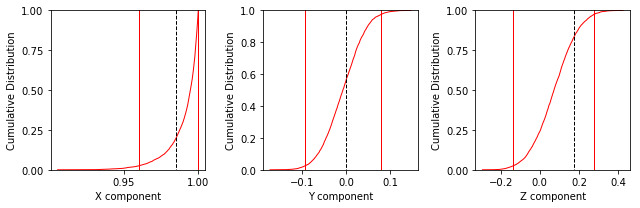

In [18]:
comp_dir=[0,9.9]
ipmag.common_mean_bootstrap(directions_A,comp_dir,figsize=(9,3))

Apparently the data (cumulative distribution functions) are entirely consistent with the expected direction (dashed lines are the cartesian coordinates of that). 

## cont_rot 

[\[Essentials Chapter 16\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch16.html#x15-15600016)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#cont_rot.py)

We can  make an orthographic projection with latitude = -20$^{\circ}$ and longitude = 0$^{\circ}$ at the center of the African and South American continents reconstructed to 180 Ma using the Torsvik et al. (2008, doi: 10.1029/2007RG000227) poles of finite rotation. We would do this by first holding Africa fixed. 

We need to read in in the outlines of continents from **continents.get_cont()**, rotate them around a rotation pole and angle as specified by the age  and continent in question (from **frp.get_pole()** using **pmag.pt_rot()**.  Then we can plot them using **pmagplotlib.plot_map()**.  If the Basemap version is preferred, use **pmagplotlib.plot_map_basemap()**. 
Here we demonstrate this from within  the notebook by just calling the  PmagPy  functions.  

In [19]:
# load in the continents module
import pmagpy.continents as continents
import pmagpy.frp as frp
help(continents.get_continent)

Help on function get_continent in module pmagpy.continents:

get_continent(continent)
    get_continent(continent)
    returns the outlines of specified continent.
    
    Parameters:
    ____________________
    continent:
        af : Africa
        congo : Congo
        kala : Kalahari
        aus : Australia
        balt : Baltica
        eur : Eurasia
        ind : India
        sam : South America
        ant : Antarctica
        grn : Greenland
        lau : Laurentia
        nam : North America
        gond : Gondawanaland
    Returns : 
        array of [lat/long] points defining continent



In [20]:
help(pmagplotlib.plot_map)

Help on function plot_map in module pmagpy.pmagplotlib:

plot_map(fignum, lats, lons, Opts)
    makes a cartopy map  with lats/lons
    Requires installation of cartopy
    
    Parameters:
    _______________
    fignum : matplotlib figure number
    lats : array or list of latitudes
    lons : array or list of longitudes
    Opts : dictionary of plotting options:
        Opts.keys=
            proj : projection [supported cartopy projections:
                pc = Plate Carree
                aea = Albers Equal Area
                aeqd = Azimuthal Equidistant
                lcc = Lambert Conformal
                lcyl = Lambert Cylindrical
                merc = Mercator
                mill = Miller Cylindrical
                moll = Mollweide [default]
                ortho = Orthographic
                robin = Robinson
                sinu = Sinusoidal
                stere = Stereographic
                tmerc = Transverse Mercator
                utm = UTM [set zone and south 

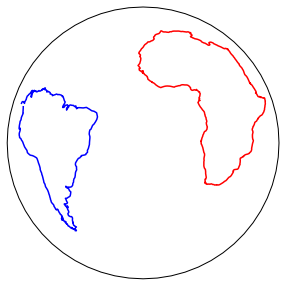

In [21]:
# retrieve continental outline
# This is the version that uses cartopy and requires installation of cartopy
af=continents.get_continent('af').transpose()
sam=continents.get_continent('sam').transpose()


#define options for pmagplotlib.plot_map
plt.figure(1,(5,5))
Opts = {'latmin': -90, 'latmax': 90, 'lonmin': 0., 'lonmax': 360., 'lat_0': -20, \
            'lon_0': 345,'proj': 'ortho', 'sym': 'r-', 'symsize': 3,\
            'pltgrid': 0, 'res': 'c', 'boundinglat': 0.}
if has_cartopy:
    pmagplotlib.plot_map(1,af[0],af[1],Opts)
    Opts['sym']='b-'
    pmagplotlib.plot_map(1,sam[0],sam[1],Opts)
elif has_basemap:
    pmagplotlib.plot_map_basemap(1,af[0],af[1],Opts)
    Opts['sym']='b-'
    pmagplotlib.plot_map_basemap(1,sam[0],sam[1],Opts)
    

Now for the rotation part.  These are in a function called **frp.get_pole()**

In [22]:
help(frp.get_pole)

Help on function get_pole in module pmagpy.frp:

get_pole(continent, age)
    returns rotation poles and angles for specified continents and ages
    assumes fixed Africa.  
    Parameters
    __________
        continent : 
            aus : Australia
            eur : Eurasia
            mad : Madacascar
            [nwaf,congo] : NW Africa  [choose one]
            col :  Colombia
            grn : Greenland
            nam : North America
            par : Paraguay
            eant :  East Antarctica
            ind : India
            [neaf,kala] : NE Africa [choose one]
            [sac,sam] :  South America [choose one]
            ib : Iberia
            saf : South Africa
      Returns
      _______
          [pole longitude, pole latitude, rotation angle] : for the continent at specified age



In [23]:
# get the rotation pole for south america relative to South Africa at 180 Ma
sam_pole=frp.get_pole('sam',180)
# NB: for african rotations, first rotate other continents to fixed Africa, then 
# rotate with South African pole (saf)


The rotation is done by **pmag.pt_rot()**.

In [24]:
help(pmag.pt_rot)

Help on function pt_rot in module pmagpy.pmag:

pt_rot(EP, Lats, Lons)
    Rotates points on a globe by an Euler pole rotation using method of
    Cox and Hart 1986, box 7-3.
    
    Parameters
    ----------
    EP : Euler pole list [lat,lon,angle]
    Lats : list of latitudes of points to be rotated
    Lons : list of longitudes of points to be rotated
    
    Returns
    _________
    RLats : rotated latitudes
    RLons : rotated longitudes



so here we go...  

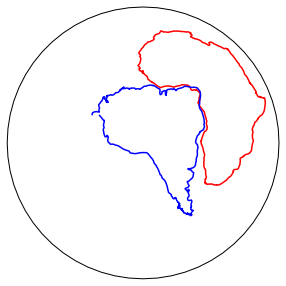

In [25]:
plt.figure(1,(5,5))
sam_rot=pmag.pt_rot(sam_pole,sam[0],sam[1]) # same for south america
# and plot 'em
Opts['sym']='r-'
if has_cartopy:
    pmagplotlib.plot_map(1,af[0],af[1],Opts)
    Opts['sym']='b-'
    pmagplotlib.plot_map(1,sam_rot[0],sam_rot[1],Opts)
elif has_basemap:
    pmagplotlib.plot_map_basemap(1,af[0],af[1],Opts)
    Opts['sym']='b-'
    pmagplotlib.plot_map_basemap(1,sam_rot[0],sam_rot[1],Opts)

## core_depthplot

[\[Essentials Chapter 15\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch15.html#x15-15600015)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#core_depthplot.py)

The program **core_depthplot** can be used to plot various measurement data versus sample depth. The data must be in the MagIC data format. The program will plot whole core data, discrete sample at a bulk demagnetization step, data from vector demagnetization experiments, and so on. 

We can try this out on some data from DSDP Hole 522, (drilled at 26S/5W) and measured by Tauxe and Hartl (1997, doi: 10.1111/j.1365-246X.1997.tb04082.x). These were  downloaded and unpacked in the [biplot_magic](#biplot_magic) example. More of the data are in the directory ../data_files/core_depthplot. 

 In this example, we will plot the alternating field (AF) data after the 15 mT step. The magnetizations will be plotted on a log scale and, as this is a record of the Oligocene, we will plot the Oligocene time scale, using the calibration of Gradstein et al. (2012), commonly referred to as “GTS12” for the the Oligocene. We are only interested in the data between 50 and 150 meters  and we are not interested in the declinations here. 


All this can be done using the wonders of Pandas data frames using the  data in the **data_files/core_depthplot** directory.   


Let's do things this way:
- read in the data from the sites and specimens files.
- Drop the records with NaN for analysts, keeping one of the three lines available for each specimen. 
- Make a new column named **site** in the specdimens table that is the same as the **specimen** column.
- (this makes sense because these are core data, so the specimen=sample=site. )
- Merge the two DataFrames on the **site** column.
- filter the data for depths between 50 and 150.
- Plot **dir_inc** versus **core_depth**.  
- Put on GAD field inclination
- plot the time scale

In [26]:
specimens=pd.read_csv('data_files/core_depthplot/specimens.txt',sep='\t',header=1)
sites=pd.read_csv('data_files/core_depthplot/sites.txt',sep='\t',header=1)
specimens=specimens.dropna(subset=['dir_inc']) # kill unwanted lines with duplicate or irrelevent info
specimens['site']=specimens['specimen'] # make a column with site name
data=pd.merge(specimens,sites,on='site') # merge the two data frames on site
data=data[data.core_depth>50] # all levels > 50
data=data[data.core_depth<150] # and < 150
lat=26 # we need this for the GAD INC


Plot versus core_depth

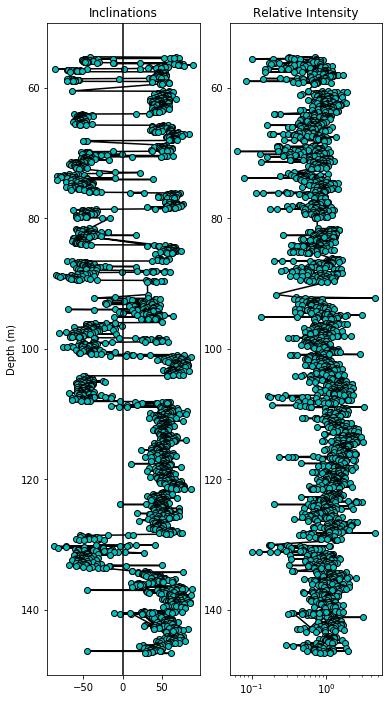

In [27]:
fig=plt.figure(1,(6,12)) # make the figure
ax=fig.add_subplot(121) # make the first of 2 subplots
plt.ylabel('Depth (m)') # label the Y axis
plt.plot(data.dir_inc,data.core_depth,'k-') # draw on a black line through the data
# draw the data points as cyan dots with black edges
plt.plot(data.dir_inc,data.core_depth,'co',markeredgecolor='black')
plt.title('Inclinations') # put on a title
plt.axvline(0,color='black')# make a central line at inc=0
plt.ylim(150,50) # set the plot Y limits to the desired depths
fig.add_subplot(122) # make the second of two subplots
# plot intensity data on semi-log plot
plt.semilogx(data.int_rel/data.int_rel.mean(),data.core_depth,'k-')
plt.semilogx(data.int_rel/data.int_rel.mean(),\
             data.core_depth,'co',markeredgecolor='black')
plt.ylim(150,50)
plt.title('Relative Intensity');


And now versus age:

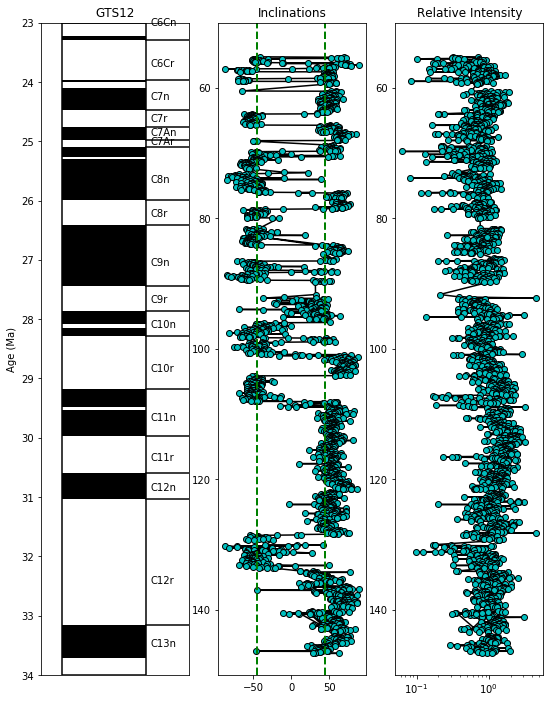

In [28]:
fig=plt.figure(1,(9,12)) # make the figure
ax=fig.add_subplot(131) # make the first of three subplots
pmagplotlib.plot_ts(ax,23,34,timescale='gts12') # plot on the time scale
fig.add_subplot(132) # make the second of three subplots
plt.plot(data.dir_inc,data.core_depth,'k-')
plt.plot(data.dir_inc,data.core_depth,'co',markeredgecolor='black')
plt.ylim(35,23)
# calculate the geocentric axial dipole field for the site latitude
gad=np.degrees(np.arctan(2.*np.tan(np.radians(lat)))) # tan (I) = 2 tan (lat)
# put it on the plot as a green dashed line
plt.axvline(gad,color='green',linestyle='dashed',linewidth=2)
plt.axvline(-gad,color='green',linestyle='dashed',linewidth=2)
plt.title('Inclinations')
plt.ylim(150,50)
fig.add_subplot(133) # make the third of three plots
# plot the intensity data on semi-log plot
plt.semilogx(data.int_rel/data.int_rel.mean(),data.core_depth,'k-')
plt.semilogx(data.int_rel/data.int_rel.mean(),data.core_depth,'co',markeredgecolor='black')
plt.ylim(150,50)
plt.title('Relative Intensity');


## curie 

[\[Essentials Chapter 6\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch6.html#x15-1560006)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#curie.py)


Curie Temperature experiments, saved in MagIC formatted files, can be plotted using **ipmag.curie()**.

In [29]:
help(ipmag.curie)

Help on function curie in module pmagpy.ipmag:

curie(path_to_file='.', file_name='', magic=False, window_length=3, save=False, save_folder='.', fmt='svg', t_begin='', t_end='')
    Plots and interprets curie temperature data.
    ***
    The 1st derivative is calculated from smoothed M-T curve (convolution
    with trianfular window with width= <-w> degrees)
    ***
    The 2nd derivative is calculated from smoothed 1st derivative curve
    (using the same sliding window width)
    ***
    The estimated curie temp. is the maximum of the 2nd derivative.
    Temperature steps should be in multiples of 1.0 degrees.
    
    Parameters
    __________
    file_name : name of file to be opened
    
    Optional Parameters (defaults are used if not specified)
    ----------
    path_to_file : path to directory that contains file (default is current directory, '.')
    window_length : dimension of smoothing window (input to smooth() function)
    save : boolean argument to save plots (default

second derivative maximum is at T=552


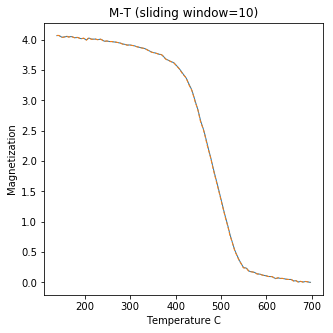

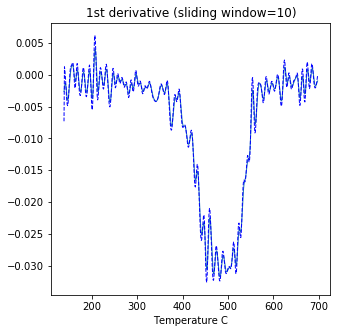

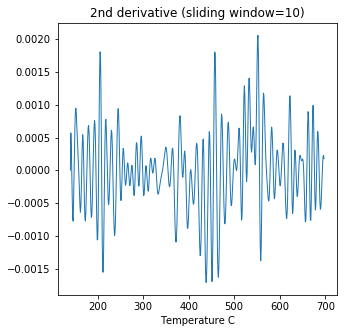

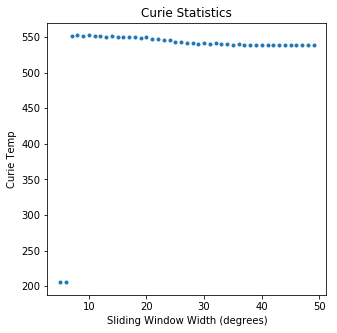

In [30]:
ipmag.curie(path_to_file='data_files/curie',file_name='curie_example.dat',\
           window_length=10)

### dayplot_magic

[\[Essentials Chapter 5\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch5.html#x15-1560005)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#dayplot_magic.py)

The program **dayplot_magic**   makes Day (Day et al., 1977), or Squareness-Coercivity and Squareness-Coercivity of Remanence plots (e.g., Tauxe et al., 2002) from the MagIC formatted data.
To do this, we will call **ipmag.dayplot()**.

In [31]:
help(ipmag.dayplot)

AttributeError: module 'pmagpy.ipmag' has no attribute 'dayplot'

In [ ]:
ipmag.dayplot(path_to_file='data_files/dayplot_magic',hyst_file='specimens.txt')

### dmag_magic

[\[Essentials Chapter 9\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch9.html#x15-15600089) [\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#dmag_magic.py)


We use **dmag_magic** to plot out the decay of all alternating field demagnetization experiments in MagIC  formatted files.   Here we can take a look at some of the data from   from Cromwell et al.  (2013, doi: 10.1002/ggge.20174). 

This program calls **pmagplotlib.plot_mag()** to plot the demagnetization curve for a sample, site, or entire data file interactively.  There is a version that will prepare dataframes for plotting with this function called **ipmag.plot_dmag()**. So let's try that: 

In [ ]:
help(ipmag.plot_dmag)

Read in data from a MagIC data model 3 file.  Let's go ahead and read it in with the full data hierarchy. 

In [ ]:
status,data=cb.add_sites_to_meas_table('data_files/dmag_magic')
data.head()

There are several forms of intensity measurements with different normalizations.  
We could hunt through the magn\_\* columns to see what is non-blank or we can use the tool **contribution_builder.get_intensity_col()** which returns the first non-zero column.  



In [ ]:
magn_col=cb.get_intensity_col(data)
print (magn_col)

Let's look at what demagnetization data are available to us:

In [ ]:
data.method_codes.unique()

Oops - at least one of our records has blank method_codes!  so, let's get rid of that one.

In [ ]:
data=data.dropna(subset=['method_codes'])

We can make the plots in this way: 
- select the AF demagnetization data with method_codes = 'LP-DIR-AF'
- make a dataframe with these columns:
     'specimen','treat_ac_field',magn_col,and 'quality'
- call ipmag.plot_dmag() to view the plot: 

In [ ]:
af_df=data[data.method_codes.str.contains('LP-DIR-AF')] # select the thermal demag data
af_df=af_df.dropna(subset=['treat_ac_field'])
df=af_df[['specimen','treat_ac_field',magn_col,'quality']]

df.head()

In [ ]:
ipmag.plot_dmag(data=df,title="AF demag",fignum=1)

This plotted all the data in the file.  we could also plot the data by site 
by getting a unique list of site names and then walk through them one by one

In [ ]:
sites=af_df.site.unique()
cnt=1
for site in sites:
    site_df=af_df[af_df.site==site] # fish out this site
    # trim to only AF data. 
    site_df=site_df[['specimen','treat_ac_field',magn_col,'quality']] 
    ipmag.plot_dmag(data=site_df,title=site,fignum=cnt)
    cnt+=1

We could repeat for thermal data if we felt like it using 'LT-T-Z' as the method_code key
and treat_temp as the step.  We could also save the plots using plt.savefig('FIGNAME.FMT') where FIGNAME could be the site, location, demag type as you wish.  

#### dmag_magic with a downloaded file
Now let's look at a [downloaded](#download_magic) contribution using [dmag_magic](#dmag_magic) as before, but this time with thermal demagnetization. 

In [ ]:
ipmag.download_magic("magic_contribution_16533.txt", dir_path="data_files/download_magic", 
                     input_dir_path="data_files/download_magic")
status,data=cb.add_sites_to_meas_table('data_files/download_magic')
df=data[data.method_codes.str.contains('LT-T-Z')] # select the thermal demag data
df=df[['specimen','treat_temp','magn_moment','quality']]
df=df.dropna(subset=['treat_temp','magn_moment'])
ipmag.plot_dmag(data=df,title="Thermal demag",fignum=1)

## eqarea

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html#x15-156000813)[\[Essentials Appendix B\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ap2.html#x21-227000B#x15-156000813) [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#eqarea.py)

The problem of plotting equal area projections in Jupyter notebooks was solved by Nick Swanson-Hysell who started the **ipmag** module just for this purpose!  We use **ipmag.plot_net()** to plot the net, then **ipmag.plot_di()** to plot the directions.  

In [ ]:
help(ipmag.plot_di)

In [ ]:
di_block=np.loadtxt('data_files/eqarea/fishrot.out')
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')

## eqarea_ell

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html)
[\[Essentials Chapter 12\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch12.html)
[\[Essentials Appendix B\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ap2.html#x21-227000B#x15-156000813) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#eqarea_ell.py)



This programe makes  plots of eqarea area projections and confidence ellipses for dec,inc pairs
We make the equal area projects with the **ipmag.plot_net()** and **ipmag.plot_di()** functions.  The options in eqarea_ell are: 
    - Bingham mean and ellipse(s)
    - Fisher mean(s) and alpha_95(s)
    - Kent mean(s) - same as Fisher - and Kent ellipse(s)
    - Bootstrapped mean(s)  - same as Fisher - and ellipse(s) 
    - Bootstrapped eigenvectors
For Bingham mean, the N/R data are assumed antipodal and the procedure would be:
    - plot the data
    - calculate the bingham ellipse with **pmag.dobingham()**
    - plot the ellipse using **pmag.plot_di_mean_ellipse()**
All others, the data are not assumed antipodal, and must be separated into normal and reverse modes. To do that you can either use **pmag.separate_directions()** to calculate ellipses for each mode, OR use **pmag.flip()** to flip the reverse mode to the normal mode.  To calculate the ellipses: 
    - calculate the ellipses for each mode (or the flipped data set):
        - Kent: use **pmag.dokent()**, setting NN to the number of data points
        - Bootstrap : use **pmag.di_boot()** to generate the bootstrapped means
            - either just plot the eigenvectors (ipmag.plot_di()) OR
            - calcualate the bootstrapped ellipses with **pmag.dokent()** setting NN to 1
        - Parametric bootstrap : you need a pandas data frame with the site mean directions, n and kappa.  Then you can use **pmag.dir_df_boot()**.  
    - plot the ellipses if desired. 
    

In [ ]:
#read in the data into an array
vectors=np.loadtxt('data_files/eqarea_ell/tk03.out').transpose()
di_block=vectors[0:2].transpose() # decs are di_block[0], incs are di_block[1]
di_block

### Bingham ellipses

In [ ]:
help(pmag.dobingham)

In [ ]:
help(ipmag.plot_di_mean_ellipse)

In [ ]:
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block)
bpars=pmag.dobingham(di_block)
ipmag.plot_di_mean_ellipse(bpars,color='red',marker='^',markersize=50)

### Fisher mean, a95

In [ ]:
help(pmag.separate_directions)

In [ ]:
vectors=np.loadtxt('data_files/eqarea_ell/tk03.out').transpose()
di_block=vectors[0:2].transpose() # decs are di_block[0], incs are di_block[1]
mode_1,mode_2=pmag.separate_directions(di_block)

In [ ]:
help(ipmag.fisher_mean)

In [ ]:
mode_1_fpars=ipmag.fisher_mean(di_block=mode_1)
mode_2_fpars=ipmag.fisher_mean(di_block=mode_2)

In [ ]:
help(ipmag.plot_di_mean)

In [ ]:
# plot the data
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')
# draw on the means and lpha95
ipmag.plot_di_mean(dec=mode_1_fpars['dec'],inc=mode_1_fpars['inc'],a95=mode_1_fpars['alpha95'],\
                  marker='*',color='blue',markersize=50)

ipmag.plot_di_mean(dec=mode_2_fpars['dec'],inc=mode_2_fpars['inc'],a95=mode_2_fpars['alpha95'],\
                  marker='*',color='blue',markersize=50)


### Kent mean and ellipse

In [ ]:
help(pmag.dokent)

In [ ]:
mode_1_kpars=pmag.dokent(mode_1,len(mode_1))
mode_2_kpars=pmag.dokent(mode_2,len(mode_2))

In [ ]:
# plot the data
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')
# draw on the means and lpha95
ipmag.plot_di_mean_ellipse(mode_1_kpars,marker='*',color='cyan',markersize=20)
ipmag.plot_di_mean_ellipse(mode_2_kpars,marker='*',color='cyan',markersize=20)

### Bootstrap eigenvectors

In [ ]:
help(pmag.di_boot)

In [ ]:
mode_1_BDIs=pmag.di_boot(mode_1)
mode_2_BDIs=pmag.di_boot(mode_2)

In [ ]:
ipmag.plot_net(1)
ipmag.plot_di(di_block=mode_1_BDIs,color='cyan',markersize=1)
ipmag.plot_di(di_block=mode_2_BDIs,color='cyan',markersize=1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')


### Boostrapped ellipses

In [ ]:
mode_1_bpars=pmag.dokent(mode_1_BDIs,1)
mode_2_bpars=pmag.dokent(mode_2_BDIs,1)

In [ ]:
# plot the data
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')
# draw on the means and lpha95
ipmag.plot_di_mean_ellipse(mode_1_bpars,marker='*',color='cyan',markersize=20)
ipmag.plot_di_mean_ellipse(mode_2_bpars,marker='*',color='cyan',markersize=20)

## eqarea_magic

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html#x15-1560008) [\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#eqarea_magic.py)


**eqarea_magic** takes MagIC data model 3 files and makes equal area projections of declination, inclination data for a variety of  selections, 
i.e. all the data, by site, by sample, or by specimen
It has the option to plot in different coordinate systems (if available) and various ellipses.  It will also make a color contour plot if desired.  
We will do this with **ipmag.plot_net()** and **ipmag_plot_di()** using **Pandas** filtering capability.  

Let's start with a simple plot of site mean directions, assuming that they were interpreted from measurements using **pmag_gui.py** or some such program and have all the required meta-data.  

We want data in geographic coordinates (dir_tilt_correction=0).  The keys for directions are dir_dec and dir_inc.     One could add the ellipses using **ipmag.plot_di_mean_ellipse()**.  

#### whole study


In [ ]:
sites=pd.read_csv('data_files/eqarea_magic/sites.txt',sep='\t',header=1)
site_dirs=sites[sites['dir_tilt_correction']==0]
ipmag.plot_net(1)
di_block=sites[['dir_dec','dir_inc']].values
#ipmag.plot_di(sites['dir_dec'].values,sites['dir_inc'].values,color='blue',markersize=50)
ipmag.plot_di(di_block=di_block,color='blue',markersize=50)

In [ ]:
# or, using ipmag.eqarea_magic:
ipmag.eqarea_magic('data_files/eqarea_magic/sites.txt', save_plots=False)

#### whole study with color contour option
for this we can use the function **pmagplotlib.plot_eq_cont()** which makes a color contour of a dec, inc data

In [ ]:
help(pmagplotlib.plot_eq_cont)

In [ ]:
ipmag.plot_net(1)
pmagplotlib.plot_eq_cont(1,di_block)

In [ ]:
# with ipmag.eqarea_magic
ipmag.eqarea_magic('data_files/eqarea_magic/sites.txt', save_plots=False, contour=True)

#### specimens by site
This study averaged specimens (not samples) by site, so we would like to make plots of all the specimen data for each site.   We can do things the in a similar way to what we did in the **dmag_magic** example.  
A few particulars:
- We will be plotting specimen interpetations in geographic coordinates (dir_tilt_correction=0)
- We need to look at the method codes as there might be fisher means, principal components, great circles, etc.  A complete list of method codes for Direction Estimation can be found here:  https://www2.earthref.org/MagIC/method-codes
- There might be 'bad' directions - 'result_quality'='b' as opposed to 'g'.  
- There are a lot of sites in this study, so let's just look at the first 10...   

In [ ]:
# read in specimen table
spec_df=pd.read_csv('data_files/eqarea_magic/specimens.txt',sep='\t',header=1) 
# read in sample table
samp_df=pd.read_csv('data_files/eqarea_magic/samples.txt',sep='\t',header=1) 
# get only what we need from samples (sample to site mapping)
samp_df=samp_df[['sample','site']] 
# merge site to specimen name in the specimen data frame
df_ext=pd.merge(spec_df,samp_df,how='inner',on='sample') 
# truncate to the first 10 sites
sites=df_ext.site.unique()[0:11]

We need to filter specimen data for dir_tilt_correction=0
and separate into DE-BFP (best fit planes) and not.

In [ ]:
# get the geographic coordinates
spec_df=df_ext[spec_df.dir_tilt_correction==0]
# filter to exclude planes
spec_lines=spec_df[spec_df.method_codes.str.contains('DE-BFP')==False]
# filter for planes
spec_df_gc=spec_df[spec_df.method_codes.str.contains('DE-BFP')==True]

In [ ]:
# here's a new one:
help(ipmag.plot_gc)

In [ ]:
cnt=1
for site in sites:
    plt.figure(cnt)
    ipmag.plot_net(cnt)
    plt.title(site)
    site_lines=spec_lines[spec_lines.site==site] # fish out this site
    ipmag.plot_di(site_lines.dir_dec.values,site_lines.dir_inc.values)
    site_planes=spec_df_gc[spec_df_gc.site==site]
    poles=site_planes[['dir_dec','dir_inc']].values
    if poles.shape[0]>0:
        ipmag.plot_gc(poles,fignum=cnt,color='r')
    cnt+=1

In [ ]:
# using ipmag.eqarea_magic:
ipmag.eqarea_magic('specimens.txt', 'data_files/eqarea_magic', plot_by='sit', save_plots=False)

#### measurements by specimen

We can do this like this:

- read in the MagIC data model 3 measurements table into a **Pandas** data frame
- get a list of unique specimen names
- truncate this to the first 10 for this purpose
- plot the dir_dec and dir_inc fields by specimen


In [ ]:
# read in measurements table
meas_df=pd.read_csv('data_files/eqarea_magic/measurements.txt',sep='\t',header=1) 
specimens=meas_df.specimen.unique()[0:11]
cnt=1
for spec in specimens:
    meas_spc=meas_df[meas_df.specimen==spec]
    plt.figure(cnt)
    ipmag.plot_net(cnt)
    plt.title(spec)
    ipmag.plot_di(meas_spc.dir_dec.values,meas_spc.dir_inc.values)
    cnt+=1

#### Individual specimens

In [ ]:
# using ipmag.eqarea_magic:
ipmag.eqarea_magic('specimens.txt', 'data_files/eqarea_magic', plot_by='spc', save_plots=False)

## find_ei

[\[Essentials Chapter 14\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch14.html#x15-1560008) [\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#find_ei.py)

This program is meant to find the unflattening factor (see [unsquish](#unsquish) documentation) that brings a sedimentary data set into agreement with the statistical field model TK03 of Tauxe and Kent (2004, doi: 10.1029/145GM08).  It  has been implemented for notebooks as **ipmag.find_ei()**.


A data file (data_files/find_EI/find_EI_example.dat) was prepared using the program **[tk03](#tk03)**  to simulate directions at a latitude of 42$^{\circ}$. with an expected inclination of 61$^{\circ}$ (which could be gotten using **[dipole_pinc](#dipole_pinc)** of course.  



In [ ]:
help(ipmag.find_ei)

In [ ]:
data=np.loadtxt('data_files/find_EI/find_EI_example.dat')
ipmag.find_ei(data)

In this example, the original expected inclination at paleolatitude of 42 (61$^{\circ}$) is recovered within the 95% confidence bounds.



## fishqq

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#fishqq.py)

This program tests whether a given directional data set is Fisher distributed using a Quantile-Quantile plot (see also [qqunf](#qqunf) or [qqplot](#qqplot) for more on Quantile-Quantile plots).  

Blessedly, **fishqq** has been incorporated into **ipmag.fishqq()** for use within notebooks.  

In [ ]:
help(ipmag.fishqq)

In [ ]:
di_block=np.loadtxt('data_files/fishqq/fishqq_example.txt')
fqpars=ipmag.fishqq(di_block=di_block)
print (fqpars['Test_result'])

## foldtest

[\[Essentials Chapter 12\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch12.html) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#foldtest.py)

**foldtest** uses the fold test of Tauxe and Watson (1994, 10.1016/0012-821x(94)90006-x  ) to find the degree of unfolding that produces the tightest distribution of directions (using the eigenvalue $\tau_1$ as the criterion.  

This can be done via **pmag.bootstrap_fold_test()**. Note that this can take several minutes.   

In [ ]:
help(ipmag.bootstrap_fold_test)

In [ ]:
data=np.loadtxt('data_files/foldtest/foldtest_example.dat')
ipmag.bootstrap_fold_test(data, num_sims=300)

## foldtest_magic

[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#foldtest_magic.py])

This is just the MagIC formatted file version of **foldtest** and can be done using **ipmag.bootstrap_fold_test()** as above.  We just have to read in the MagIC formattest files and make a data matrix of the format expected by **ipmag.bootstrap_fold_test()**.  Here, **Pandas** is our friend.  We will: 
- Read in the MagIC (data model 3) formatted file
- Make a **Numpy** array with the required fields
- call **ipmag.bootstrap_foldtest_magic()**


In [ ]:
sites=pd.read_csv('data_files/foldtest_magic/sites.txt',sep='\t',header=1)
sites.columns

The columns we need are: dir_dec, dir_inc, bed_dip_direction, bed_dip
The dir_dec and dir_inc have to have a dir_tilt_correction of 0 (geographic coordinates).
A little looking through the sites data file shows that the bed_dip_direction are on a separate line (oh database conversion tool maestro, how clever!).  So we will have to pair the bedding orientations with the geographic directional info.  Thank goodness for **Pandas**!


In [ ]:
# read in data file
sites=pd.read_csv('data_files/foldtest_magic/sites.txt',sep='\t',header=1)
# get the records with bed_dip and bed_dip_direction
sites_bedding=sites.dropna(subset=['bed_dip','bed_dip_direction'])
# get rid of them out of the original data frame
sites.drop(['bed_dip','bed_dip_direction'],axis=1,inplace=True)
# just pick out what we want (bedding orientation of the sites)
sites_bedding=sites_bedding[['site','bed_dip','bed_dip_direction']]
# put them back into the original data frame
sites=pd.merge(sites,sites_bedding,how='inner',on='site')
# now we can pick out the desired coordinate system
sites_geo=sites[sites.dir_tilt_correction==0]
# and make our data array
data=sites_geo[['dir_dec','dir_inc','bed_dip_direction','bed_dip']].values


NB: One unfortunate thing about the MagIC data model is that bedding orientation information can be either in the samples.txt or the sites.txt file.  This example assumes the data are in the _sites.txt_ file.  If not, you can read in the _samples.txt_ file and merge the bedding information with the site directions.  

In [ ]:
# and off we go! 
ipmag.bootstrap_fold_test(data, num_sims=300)

## forc_diagram
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#forc_diagram.py)

In [ ]:
from programs.forc_diagram import *

forc = Forc(fileAdres='data_files/forc_diagram/conventional_example.forc',SF=3)

fig = plt.figure(figsize=(6,5), facecolor='white')

fig.subplots_adjust(left=0.18, right=0.97,
                    bottom=0.18, top=0.9, wspace=0.5, hspace=0.5)
plt.contour(forc.xi*1000,
            forc.yi*1000,
            forc.zi,9,
            colors='k',linewidths=0.5)#mt to T

plt.pcolormesh(forc.xi*1000,
               forc.yi*1000,
               forc.zi,
               cmap=plt.get_cmap('rainbow'))#vmin=np.min(rho)-0.2)
plt.colorbar()
plt.xlabel('B$_{c}$ (mT)',fontsize=12)
plt.ylabel('B$_{i}$ (mT)',fontsize=12)

plt.show()

## histplot


You should use the function **plt.hist()** for this - see **[gaussian](#gaussian)** example.

## hysteresis_magic

[\[Essentials Chapter 5\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch5.html#x15-156000813)
[\[Essentials Chapter 7\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch7.html#x15-156000813)
[\[Essentials Appendix C\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ap3.html#x21-227000B#x15-156000813)
[\[MagIC Database\]](https://earthref.org/MagIC)  
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#hysteresis_magic.py)

This program plots MagIC formatted measurement data as hysteresis loops, $\Delta$M, d$\Delta$M and backfield curves, depending on what data are available.  There is an **ipmag.hysteresis_magic** function that does this for us.  

In [ ]:
help(ipmag.hysteresis_magic)

So let's try this out with some data from Ben-Yosef et al., (2008;doi: 10.1029/2007JB005235). The default is to plot the first 5 specimens and that is enough for us.  We also do not need to save plots at this point.  

In [ ]:
ipmag.hysteresis_magic(output_dir_path='data_files/hysteresis_magic/',save_plots=False)

## irm_unmix

In [ ]:
import matplotlib
from programs.irm_unmix import dataFit, fit_plots
fitResult = dataFit(filePath='data_files/irm_unmix/irm_unmix_example.dat',fitNumber=3)

xfit=fitResult.fitDf['field']
xraw=fitResult.rawDf['field_log']
yfit=fitResult.pdf_best
yraw=fitResult.rawDf['rem_grad_norm']

fig = plt.figure(1, figsize=(5, 5))
ax = fig.add_subplot(111)

fit_plots(ax,xfit,xraw,yfit,yraw)

## irmaq_magic

[\[Essentials Chapter 8\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch8.html) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#irmaq_magic.py)

Someone (Saiko Sugisaki) measured a number of samples from IODP Expedition 318 Hole U1359A for IRM acquisition curves. These were converted to the MagIC measurements format and saved in ../irmaq_magic/measurements.txt.  

This program reads in a MagIC data model 3 file with IRM acquisition data and plots it by calling **pmagplotlib.plot_mag()** with options to plot by entire data file, site, sample or individual specimen.  We can do that too!  All we need to know is the method_code for IRM acquisition (which I do), and to propogate specimen => sample => site identities if any other plotting option besides "entire file" or by specimen is desired.  

In [ ]:
plt.clf()
help(pmagplotlib.plot_mag)

In [ ]:
# make the figure
plt.figure(1,(5,5))
#read in the data
data=pd.read_csv('data_files/irmaq_magic/measurements.txt',sep='\t',header=1)
# fish out the IRM data
data=data[data.method_codes.str.contains('LP-IRM')] # 
data['zero']=0 # make a dummy field initialized with zero
data['one']=1 # make a dummy field initialized with one
# make the required list
# possible intensity fields are:
#['magn_moment', 'magn_volume', 'magn_mass', 'magnitude']
# this data file has magn_moment data
# pmagplotlib.plotMT plots data by specimen, so get list of specimens
specimens=data.specimen.unique()
for specimen in specimens: # step through one by one
    spec_df=data[data.specimen==specimen] # get data for this specimen
    # make the data block required
    datablock=np.array(spec_df[['treat_dc_field','zero','zero','magn_moment','one','quality']]).tolist()
    pmagplotlib.plot_mag(1,datablock,'Example',0,'T',1)

### lnp_magic

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html#x15-156000813)
[\[Essentials Appendix C\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ap3.html#x21-227000B#x15-156000813)
[\[MagIC Database\]](https://earthref.org/MagIC)  
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#lnp_magic.py)


This program makes equal area projections site by site along with the 
Fisher confidence ellipses using the McFadden and McElhinny (1988, doi: 10.1016/0012-821X(88)90072-6) 
method for combining lines and planes.  Options are to plot in specimen, geographic or tilt corrected coordinate systems (although the specimen coordinate system is a bit silly if the specimens were not mutually oriented and the geographic and tilt correctioed would presumably be identical except for a coherent rotation of the site.)
It also builds in filters for MAD or $\alpha_{95}$ cutoffs at the specimen level.

After filtering, the site level data are processed by **pmag.dolnp()** which calculates the MM88 statistics.  These, along with the data are then plotted by **pmagplotlib.plot_lnp()**.  

We can do all that from within the notebook, using the wonders of Pandas.

In [ ]:
help(pmagplotlib.plot_lnp)

In [ ]:
# read in specimen data
spec_df=pd.read_csv('data_files/lnp_magic/specimens.txt',sep='\t',header=1)
# filter for quality = 'g'
if 'quality'  in spec_df.columns:
    spec_df=spec_df[spec_df.quality=='g']
spec_df.head()


Of course, this being a data file conerted from data model 2.5 there are several lines per specimen. we want the non-blank dir_dec info with the desired (0) tilt correction

In [ ]:
spec_df=spec_df.dropna(subset=['dir_dec','dir_inc','dir_tilt_correction'])
spec_df=spec_df[spec_df.dir_tilt_correction==0]
spec_df.head()

Let's proceed this way:
- get a list of all the site names. for this we will have to pair the sample with the site name from the samples.txt file.
- look at the data (only quality = 'g'), site by site, sending it to first **pmag.dolnp()**, then to **pmagplotlib.plot_lnp()**.

In [ ]:
# read in samples table in order to pair site name to specimen data
samp_df=pd.read_csv('data_files/lnp_magic/samples.txt',sep='\t',header=1)
samp_df.head()

Of course there are duplicate sample records, so let's drop the blank lat rows (to make sure we have all the blank specimens rows, then make the data frame with just 'sample' and site' columns. Then we can merge it with the spec_df dataframe. 

In [ ]:
samp_df=samp_df.dropna(subset=['specimens'])
samp_df=samp_df[['sample','site']]
spec_df=pd.merge(spec_df,samp_df,on='sample')
spec_df

In [ ]:
# get the site names
sites=spec_df.site.unique()
sites

Let's plot up the first 10 or so.

In [ ]:
help(pmag.dolnp)

In [ ]:
help(pmagplotlib.plot_lnp)

In [ ]:
cnt=1
for site in sites[0:10]:
    pmagplotlib.plot_init(cnt, 5, 5)
    site_data=spec_df[spec_df.site==site].to_dict('records')
    fpars=pmag.dolnp(site_data,'specimen_direction_type')
    pmagplotlib.plot_lnp(cnt,site,site_data,fpars,'specimen_direction_type')
    cnt+=1


### lowes

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html#x15-156000813)
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#lowes.py)


This program generates a Lowes (1974, doi: 10.1111/j.1365-246X.1974.tb00622.x)  spectrum from igrf-like field models.  It will take a specified date, get the gauss coefficients from [**pmag.doigrf()**](#igrf), unpack them into a usable format with **pmag.unpack()** and calculate the spectrum with **pmag.lowes()**.  

In [ ]:
help(pmag.unpack)

In [ ]:
help(pmag.lowes)

So let's do it!

In [ ]:
date=1956 # pick a date and what better one than my birth year?  
coeffs=pmag.doigrf(0,0,0,date,coeffs=1) # get the gauss coefficients
data=pmag.unpack(coeffs) # unpack them into the form that lowes likes
Ls,Rs=pmag.lowes(data) # get the power spectrum


In [ ]:
plt.plot(Ls,Rs,linewidth=2,label=str(date)) # make the plot
plt.semilogy() # semi log it
plt.xlabel('Degree (l)')
plt.ylabel('Power ($\mu$T$^2$)')
plt.legend();



### lowrie and lowrie_magic

[\[Essentials Chapter 8\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch8.html#x15-156000813)
[\[command line versions\]](http://pmagpy.github.io/PmagPy-cli.html#lowrie.py)

 Someone (Saiko Sugisaki) subjected a number of specimens from IODP Expedition 318 Site U1361 specimens to a Lowrie (1990, doi: 10.1029/GL017i002p00159) 3-D IRM experiment (published as Tauxe et al., 2015, doi:10.1016/j.epsl.2014.12.034). **lowrie** makes plots of blocking temperature for the three coercivity fractions.


Both **lowrie** and **lowrie_magic**   take specimen level 3D-IRM data, break them into the cartesian coordinates  of the three IRM field directions and plot the different components versus demagnetizing temperature.  We can  do this with our powerful **Pandas** and **matplotlib**.  
The relevent MagIC database method code is 'LP-IRM-3D', magnetization code is one of the usual, but in this example it is 'magn_moment' and the temperature step is the usual data model 3.0 ('treat_temp') in kelvin.


We will use **pmag.dir2cart()** for the heavy lifting.  I also happen to know (because I wrote the original paper), that the X direction was the 1.0 tesla step, Y was 0.5 tesla and Z was .1 tesla, so we can put these in the legend. 

In [ ]:
help(pmag.dir2cart)

In [ ]:
# read in the data file
meas_df=pd.read_csv('data_files/lowrie_magic/measurements.txt',sep='\t',header=1)
# pick out the 3d-IRM data
meas_df=meas_df[meas_df.method_codes.str.contains('LP-IRM-3D')]
# get a list of specimen names
specimens=meas_df.specimen.unique()
cnt=1 # set figure counter
for specimen in specimens[0:10]: # step through first 10
    spec_df=meas_df[meas_df.specimen==specimen] # collect this specimen's data    
    dirs=np.array(spec_df[['dir_dec','dir_inc','magn_moment']])
    norm=dirs[0][2] # let's normalize to the initial intensity
    carts=np.absolute((pmag.dir2cart(dirs)/norm)).transpose() # get the X,Y,Z data
    temps=spec_df['treat_temp']-273 # convert to Celcius
    plt.figure(cnt,(6,6))
    plt.plot(temps,carts[0],'ro',label='1 T')
    plt.plot(temps,carts[0],'r-')
    plt.plot(temps,carts[1],'cs',label='0.5 T')
    plt.plot(temps,carts[1],'c-')
    plt.plot(temps,carts[2],'k^',label='0.1 T')
    plt.plot(temps,carts[2],'k-')
    plt.title(specimen+' : Lowrie 3-D IRM')
    plt.legend();
    cnt+=1

        

### plotXY

This can be done directly with matplotlib.

### plot_cdf

[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#plot_cdf.py)

This program reads in a data file, sorts it and plots the data as a cumulative distribution function (using **pmagplotlib.plot_cdf()**.  But we can do this directly from within the notebook without much fuss. And for plot_2cdfs, just do this twice.  


In [ ]:
# read the data in
data=np.loadtxt('data_files/plot_cdf/gaussian.out')
# sort the data
x=np.sort(data)
# create a y array
y=np.linspace(0,1,data.shape[0])
plt.plot(x,y,'r-')
# label
plt.xlabel('Data')
plt.ylabel('Cumulative Distribution');

### plot_geomagia

[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#plot_geomagia.py)

Geomagia is a database specially designed for archaeomagnetic and volcanic data for the last 50 kyr with a friendly search interface.   **plot_geomagia**   is meant to plot data from files downloaded from the geomagia website: http://geomagia.gfz-potsdam.de/geomagiav3/AAquery.php.  We can do this within the notebook.  The example used here  was for Sicily so if we felt like it, we could combine it with the **ipmag.igrf()** using one of the data models (which are in large part based on data in the geomagia database.  

Here we want to plot inclination as a function of age.  

In [ ]:
geomagia=pd.read_csv('data_files/geomagia/geomagia_sel.txt',header=1)
geomagia.head()

We have to 'clean' the dataset by getting rid of the records with no inclinations (-999)  We can use Panda's filtering power for that: 

In [ ]:
geomagia_incs=geomagia[geomagia['Inc[deg.]']>-90]
geomagia_incs['Inc[deg.]']

In [ ]:
plt.plot(geomagia_incs['Age[yr.AD]'],geomagia_incs['Inc[deg.]'],'ro')
plt.xlabel('Age (CE)')
plt.ylabel('Inclination');

### plot_mag_map

[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#plot_mag_map.py)

This program was designed to make color contour maps of geomagnetic field elements drawn from various IGRF-like field models (see also [igrf](#igrf)).  
It calls **pmag.do_mag_map())** to generate arrays for plotting with the **pmagplotlib.plot_mag_map()** function.   We can do that from within this notebook.  NB: The cartopy version of this is still a bit buggy and functions best with the PlateCarree projection.  

In [ ]:
help(pmag.do_mag_map)

In [ ]:
# define some useful parameters
date,mod,lon_0,alt,ghfile=1956.0725,'cals10k.2',0,0,"" # only date is required
Ds,Is,Bs,Brs,lons,lats=pmag.do_mag_map(date,mod=mod,lon_0=lon_0,alt=alt,file=ghfile)

In [ ]:
help(ipmag.igrf)

In [ ]:
help(pmagplotlib.plot_mag_map)

In [ ]:
cmap='RdYlBu' # nice color map for contourf
if has_cartopy:
    pmagplotlib.plot_mag_map(1,Bs,lons,lats,'B',date=date,proj='Mollweide',contours=True) # plot the field strength
    pmagplotlib.plot_mag_map(2,Is,lons,lats,'I',date=date,proj='Mollweide',contours=True)# plot the inclination
    pmagplotlib.plot_mag_map(3,Ds,lons,lats,'D',date=date,contours=True)# plot the declination    
elif has_basemap:
    pmagplotlib.plot_mag_map_basemap(1,Bs,lons,lats,'B',date=date) # plot the field strength
    pmagplotlib.plot_mag_map_basemap(2,Is,lons,lats,'I',date=date)# plot the inclination
    pmagplotlib.plot_mag_map_basemap(3,Ds,lons,lats,'D',date=date)# plot the declination
    

### plot_map_pts

[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#plot_map_pts.py)

This program will generate a simple map of the data points read from a file (lon lat) on the desired projection. If you want to use high resolution or the etopo20 meshgrid with basemap, you must install the etopo20 data files (run  **install_etopo.py** from the command line).

This program sets  a bunch of options and calls **pmagplotlib.plot_map()**.  Note, if Basemap is  installed, you can use **pmagplotlib.plot_map_basemap()** instead which uses the older (but less buggy) and soon to be deprecated **Basemap** plotting package.   


In [ ]:
help(pmagplotlib.plot_map)

In [ ]:
# read in some data: 
# this is the cartopy version
data=np.loadtxt('data_files/plot_map_pts/uniform.out').transpose()
lons=data[0] # longitudes array
lats=data[1] # latitudes array
# set some options 
Opts={}
Opts['sym']='bo' # sets the symbol to white dots
Opts['symsize']=3 # sets symbol size to 3 pts
Opts['proj']='robin' # Robinson projection
Opts['details']={}
Opts['details']['coasts']=True
plt.figure(1,(10,10)) # optional - make a map
if has_cartopy:
    pmagplotlib.plot_map(1, lats, lons, Opts)
elif has_basemap:
    pmagplotlib.plot_map_basemap(1, lats, lons, Opts)
    

In [ ]:
# read in some data: 
data=np.loadtxt('data_files/plot_map_pts/uniform.out').transpose()
lons=data[0] # longitudes array
lats=data[1] # latitudes array
# set some options 
Opts={}
Opts['sym']='wo' # sets the symbol to white dots
Opts['symsize']=3 # sets symbol size to 10 pts
Opts['proj']='pc' # Platecarre projection
Opts['edge']='black'
Opts['details']={}
Opts['details']['fancy']=True # this option takes a while....   
if has_cartopy:
    plt.figure(1,(8,8)) # optional - make a map
    pmagplotlib.plot_map(1, lats, lons, Opts)   
elif has_basemap: # this only works if you have basemap installed
    plt.figure(1,(6,6)) # optional - make a map
    pmagplotlib.plot_map_basemap(1, lats, lons, Opts)
    

Here's an example with a simple site location.

In [ ]:
Opts={}
Opts['sym']='r*' # sets the symbol to white dots
Opts['symsize']=100 # sets symbol size to 3 pts
Opts['proj']='lcc' # Lambert Conformal projection
Opts['pltgrid']=True
Opts['lat_0']=33
Opts['lon_0']=260
Opts['latmin']=20
Opts['latmax']=52
Opts['lonmin']=-130
Opts['lonmax']=-70
Opts['gridspace']=10
Opts['details']={}
Opts['details']['coasts']=True
Opts['details']['ocean']=True
Opts['details']['countries']=True
Opts['global']=False
lats,lons=[33],[-117]
plt.figure(1,(10,10)) # optional - make a map
if has_cartopy:
    pmagplotlib.plot_map(1, lats, lons, Opts)
elif has_basemap:
    pmagplotlib.plot_map_basemap(1, lats, lons, Opts)

    


### plotdi_a

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#plotdi_a.py)


**plotdi_a** reads in a data file with declination, inclination and $\alpha_{95}$ data in it and plots the directions along with the confidence circles.  

We can use the function **ipmag.plot_di_mean()** for this.  


In [ ]:
help(ipmag.plot_di_mean)

In [ ]:
# read in some data
data=np.loadtxt('data_files/plotdi_a/plotdi_a_example.dat').transpose()
decs=data[0] # array of declinations
incs=data[1] # array of inclinations
a95s=data[2] # array of alpha95s
# make the plots
fignum=1
plt.figure(num=fignum,figsize=(3,3)) # make a figure object
ipmag.plot_net(fignum) # plot the equal area net
for pt in range(decs.shape[0]): # step through the data
    ipmag.plot_di_mean(dec=decs[pt],inc=incs[pt],a95=a95s[pt],color='blue')


### polemap_magic


[\[Essentials Chapter 16\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch16.html) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#polemap_magic.py)

**polemap_magic** plots poles from a MagIC formatted **locations.txt** file.  Alternatively, we 
 can use **ipmag.plot_vgp()** for this, but substituting paleomagnetic poles for VGPs (the math is the same).  We'll try this out on a set of poles downloaded from the MagIC database for the Cretaceous of Europe.   
 
 Let's try it both ways, first with **ipmag.plot_vgp( )**:


In [ ]:
help(ipmag.plot_vgp)

In [ ]:
help(ipmag.make_orthographic_map)

In [ ]:
data=pd.read_csv('data_files/polemap_magic/locations.txt',sep='\t',header=1)
lats=data['pole_lat'].values
lons=data['pole_lon'].values
if has_cartopy:
    map_axis =ipmag.make_orthographic_map(central_latitude=90,figsize=(6,6),land_color='bisque')
    ipmag.plot_vgp(map_axis, vgp_lon=lons, vgp_lat=lats,\
                   markersize=20, legend='no')    
    
elif has_basemap:
    m = Basemap(projection='ortho',lat_0=90,lon_0=0)
    plt.figure(figsize=(6, 6))
    m.drawcoastlines(linewidth=0.25)
    m.fillcontinents(color='bisque',lake_color='white',zorder=1)
    m.drawmapboundary(fill_color='white')
    m.drawmeridians(np.arange(0,360,30))
    m.drawparallels(np.arange(-90,90,30))
    ipmag.plot_vgp_basemap(m, vgp_lon=lons, vgp_lat=lats, color='k', marker='o', \
                   markersize=20, legend='no')

Alternatively, you can use the function **ipmag.polemap_magic**.

In [ ]:
help(ipmag.polemap_magic)

In [ ]:
ipmag.polemap_magic('data_files/polemap_magic/locations.txt', save_plots=False)

### plot_ts

**pmagplotlib.plot_ts( )** makes a plot of the Geomagnetic Reversal Time Scale (your choice of several) between specified age points.  

In [ ]:
help(pmagplotlib.plot_ts)

In [ ]:
fig=plt.figure(1,(3,12))
ax=fig.add_subplot(111)
agemin,agemax=0,10
pmagplotlib.plot_ts(ax,agemin,agemax)



### qqplot

[\[Essentials Appendix B.1.5\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ap2.html)
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#qqplot.py)

**qqplot** makes  a quantile-quantile plot of the input data file against a normal distribution. The plot has the mean, standard deviation and the $D$ statistic as well as the $D_c$ statistic expected from a normal distribution. We can read in a data file and then call **pmagplotlib.plot_qq_norm()**. Let's reprise the [**gaussian**](#gaussian) example from before and test if the data are in fact likely to be normally distributed.    


In [ ]:
data=list(pmag.gaussdev(10,3,100))

In [ ]:
help(pmagplotlib.plot_qq_norm)

In [ ]:
D,Dc=pmagplotlib.plot_qq_norm(1,data,'')
print (D,Dc)

Whew!  it worked this time.  It will fail about 5% of the time.  

### qqunf

[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#qqunf.py)

This program is very much like [**qqplot**](#qqplot) and [**fishqq**](#fishqq) which plot data against a normal and Fisherian distributions respectively.  In fact **fishqq** plots the declination values against a uniform distribution just like **qqunf**. 

**qqunf.py** (the command line version) calls **pmagplotlib.plot_qq_unf()**.  To demonstrate the functionality of **qqplot**, we can generate a simulated data set with **random.uniform()**, inspect it with a histogram and then test whether it is likely to actually have been drawn from a uniform distribution (95% confidence) using **pmagplotlib.plot_qq_unf()**.

In [ ]:
import numpy.random as random
uniform=random.uniform(0,100,size=100)
plt.hist(uniform,histtype='step',color='blue',density=True,facecolor='white')

In [ ]:
Mu,Mu_0=pmagplotlib.plot_qq_unf(1,uniform,"",degrees=False)

### quick_hyst
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#quick_hyst.py)


In [ ]:
from importlib import reload
reload(ipmag)

ipmag.quick_hyst("data_files/3_0/McMurdo")#, save_plots=False)

### revtest

[\[Essentials Chapter 12\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch12.html)
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#revtest.py)

**revtest** uses the boostrap reversals test described in detail in [\[Chapter 12\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch12.html) of the online text book "Essentials of Paleomagnetism".  It splits the data into two polarity groups, flips the "reverse" mode to its antipodes and does the test for [common_mean](#common_mean) on the two groups.   It has been implemented for notebooks as **ipmag.reversal_test_bootstrap())**.  

In [ ]:
help(ipmag.reversal_test_bootstrap)

In [ ]:
di_block=np.loadtxt('data_files/revtest/revtest_example.txt')
ipmag.reversal_test_bootstrap(di_block=di_block,plot_stereo=True)

### revtest_magic

[\[Essentials Chapter 12\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch12.html)
[\[MagIC Database\]](https://earthref.org/MagIC)
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#revtest_magic.py)


This is the same idea as **revtest** but reads in MagIC formatted data files.  We will do this the **Pandas** way.  

In [ ]:
data=pd.read_csv('data_files/revtest_magic/sites.txt',sep='\t',header=1)
decs=data.dir_dec.values
incs=data.dir_inc.values
ipmag.reversal_test_bootstrap(dec=decs,inc=incs,plot_stereo=True)

### revtest_mm1990

This program has been deprecated as it  is the same as [watsons_v](#watons_v) - check that one out. 

### thellier_magic

[\[Essentials Chapter 10\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch10.html) 
[\[MagIC Database\]](https://earthref.org/MagIC)
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#thellier_magic.py)

**thellier_magic** makes plots for Thellier-Thellier (Thellier E and Thellier O, 1959, Annales de Geophysique 15: 285–378) type experimental data.   
It reads in MagIC formatted data, sorts the data into datablocks for plotting as Arai (Nagata et al., 1963, doi: 10.1029/JZ068i018p05277) or  Zijderveld (Zijderveld, J. D. A. (1967). A.C. demagnetization of rocks: analysis of results. In D. Collinson, K. Creer, & S. Runcorn (Eds.), Methods in Paleomagnetism (pp. 254–286). Amsterdam: Elsevier) as well as equal area projections and de (re) magnetization plots. 

For full functionality, you should use the Thellier GUI program (in **pmag_gui.py** from the command line), but within a notebook you can take a quick look using **ipmag.thellier_magic()**.  

Here we will look at some data from Shaar et al. (2011, doi: 10.1016/j.epsl.2010.11.013).   



In [ ]:
# plot the first five specimens
ipmag.thellier_magic(input_dir_path='data_files/thellier_magic/', 
                     n_specs=5, save_plots=False, fmt="png") # s2s0-05 

### vgpmap_magic

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html) 
[\[MagIC Database\]](https://earthref.org/MagIC)
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#vgpmap_magic.py)

Plotting distributions of Virtual Geomagnetic Poles on many desired map projections is a frequent need in paleomagnetism.  **vgpmap_magic** reads in MagIC formatted files and has a number of plotting options.  It has been implemented into the **ipmag** module by Nick Swanson-Hysell as **ipmag.plot_vgp()**.  
We cam use  **ipmag.plot_vgp()** after reading in a MagIC formatted sites.txt file. 

NB: you could also use **pmagplotlib.plot_map()** (see [**plot_map_pts**](#plot_map_pts)) if more options are desired. 

In [ ]:
help(ipmag.plot_vgp)

In [ ]:
data=pd.read_csv('data_files/vgpmap_magic/sites.txt',sep='\t',header=1)
data.columns

In [ ]:
help(ipmag.make_orthographic_map)

In [ ]:
lats=data['vgp_lat'].values
lons=data['vgp_lon'].values
if has_cartopy:
    map_axis =ipmag.make_orthographic_map(central_latitude=60,figsize=(6,6),land_color='bisque',\
                                          add_ocean=True,ocean_color='azure')
    ipmag.plot_vgp(map_axis, vgp_lon=lons, vgp_lat=lats,\
                   markersize=50, legend='no',color='red')    
    
elif has_basemap:
    m = Basemap(projection='ortho',lat_0=60,lon_0=0)
    plt.figure(figsize=(6, 6))
    m.drawcoastlines(linewidth=0.25)
    m.fillcontinents(color='bisque',lake_color='azure',zorder=1)
    m.drawmapboundary(fill_color='azure')
    m.drawmeridians(np.arange(0,360,30))
    m.drawparallels(np.arange(-90,90,30))
    ipmag.plot_vgp_basemap(m, vgp_lon=lons, vgp_lat=lats, color='r', marker='o', \
                   markersize=50, legend='no')

Or, you can run ipmag.vgpmap_magic:

In [ ]:
help(ipmag.vgpmap_magic)

In [ ]:
ipmag.vgpmap_magic('data_files/vgpmap_magic', lat_0=60, save_plots=False)

### watsons_v

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#watsons_v.py)

Watson (1983, doi: 10.1016/0378-3758(83)90043-5) proposed a clever Monte Carlo type test for a common mean direction for two data sets.  This was implemented as 
 **ipmag.common_mean_watson()**. 


In [ ]:
help(ipmag.common_mean_watson)

In [ ]:
# use the same data as for watsons_f
DI1=np.loadtxt('data_files/watsons_f/watsons_f_example_file1.dat')
DI2=np.loadtxt('data_files/watsons_f/watsons_f_example_file2.dat')

plt.figure(1,(5,5))
ipmag.common_mean_watson(DI1,DI2,plot='yes')


### zeq 

[\[Essentials Chapter 9\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch9.html) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#zeq.py)

**zeq** is a quick and dirty plotter for Zijderveld (Zijderveld, J. D. A. (1967). A.C. demagnetization of rocks: analysis of results. In D. Collinson, K. Creer, & S. Runcorn (Eds.), Methods in Paleomagnetism (pp. 254–286). Amsterdam: Elsevier) diagrams.  It calls **pmagplotlib.plot_zed()** to do the plotting. 

This example plots the data in specimen coordinates = if other coordinate systems are desired, perform [**di_geo**](#di_geo) and [**di_tilt**](#di_tilt) steps first.  



In [ ]:
help(pmagplotlib.plot_zed)

In [ ]:
# we can make the figure dictionary that pmagplotlib likes:
ZED={'eqarea':1,'zijd':2, 'demag':3}# make datablock
 # read in data
data=pd.read_csv('data_files/zeq/zeq_example.dat',delim_whitespace=True,header=None)
data.columns=['specimen','step','m (emu)','dec','inc']
data['m SI']=data['m (emu)']*1e-3 # convert to SI units from lab (emu) units
data['quality']='g' # add in default "good" quality designation
data['step SI']=data['step']*1e-3 # convert to tesla 
data['blank']="" # this is a dummy variable expected by plotZED
specimens=data.specimen.unique()
angle=0
units='T' # these are AF data
cnt=1
for s in specimens:
    # we can make the figure dictionary that pmagplotlib likes:
    ZED={'eqarea':cnt,'zijd':cnt+1, 'demag':cnt+2}# make datablock
    cnt+=3
    spec_df=data[data.specimen==s]
    datablock=spec_df[['step SI','dec','inc','m SI','blank','quality']].values.tolist()
    pmagplotlib.plot_zed(ZED,datablock,angle,s,units)
    


### zeq_magic

[\[Essentials Chapter 9\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch9.html) 
[\[MagIC Database\]](https://earthref.org/MagIC)
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#zeq_magic.py)

This program is the same as [**zeq**](#zeq) but for MagIC formatted input files.  This example plots the data in specimen coordinates = if other coordinate systems are desired, perform [**di_geo**](#di_geo) and [**di_tilt**](#di_tilt) steps first.



In [ ]:
 # read in MagIC foramatted data
dir_path='data_files/zeq_magic/'
ipmag.zeq_magic(input_dir_path=dir_path, save_plots=False)